In [1]:
# Cell 1: Imports and Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.patches import Circle  # <-- This line is required

data = pd.read_csv("preprocessed_data.csv")
df = pd.DataFrame(data)
df = df.select_dtypes(include=['float64', 'int64'])
df.dropna(inplace=True)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)

In [2]:
# Cell 2: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

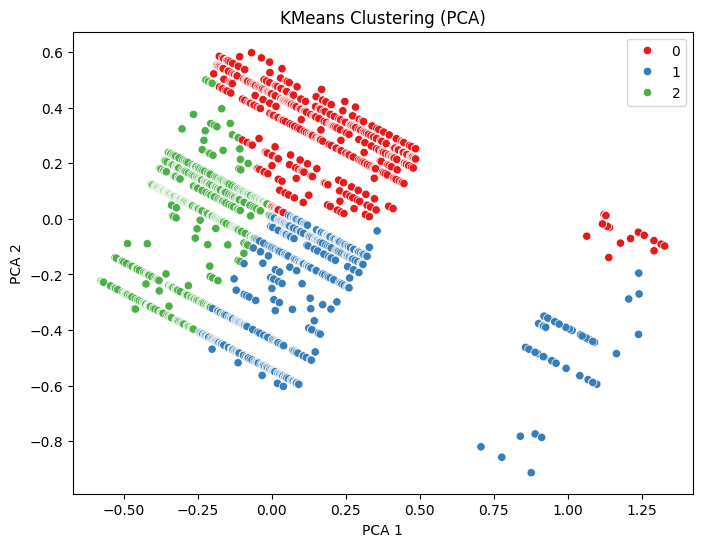

In [3]:
# Cell 3: Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1')
plt.title('KMeans Clustering (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [4]:
# 4. PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

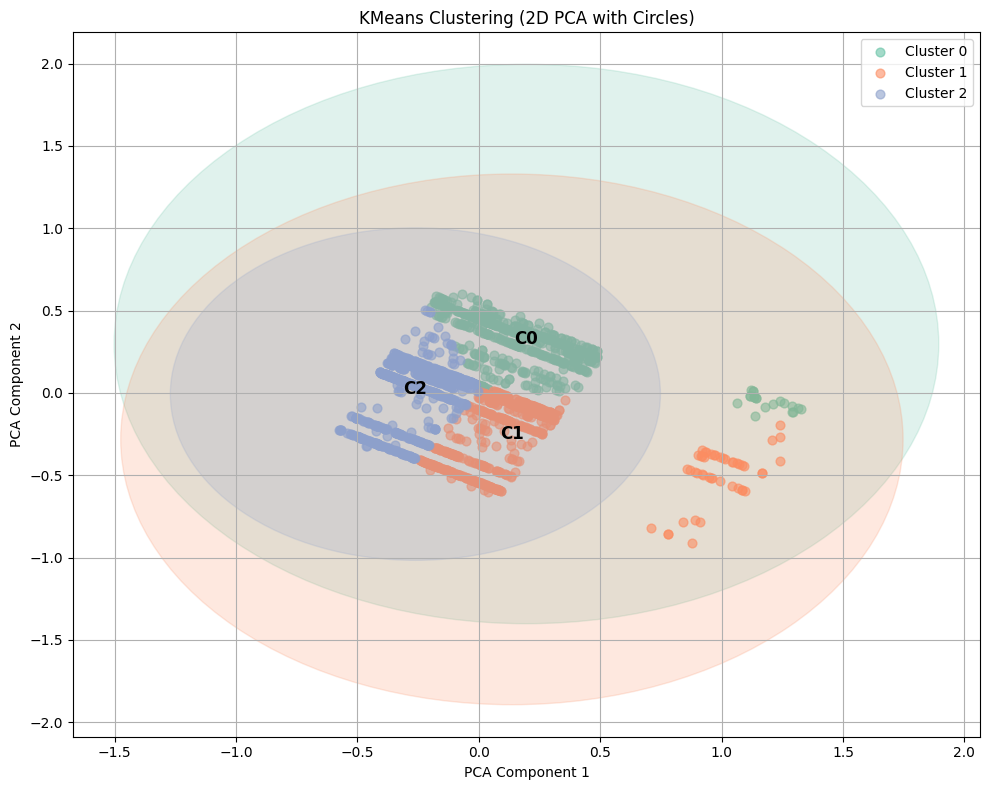

In [5]:

# 5. 2D Cluster Visualization with Circles
plt.figure(figsize=(10, 8))
palette = sns.color_palette("Set2", n_colors=df['Cluster'].nunique())

for cluster in sorted(df['Cluster'].unique()):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                label=f'Cluster {cluster}', alpha=0.6, s=40, c=[palette[cluster]])
    
    x_mean = cluster_data['PCA1'].mean()
    y_mean = cluster_data['PCA2'].mean()
    radius = np.max(np.sqrt((cluster_data['PCA1'] - x_mean)**2 + (cluster_data['PCA2'] - y_mean)**2))
    
    circle = Circle((x_mean, y_mean), radius + 0.5, color=palette[cluster], alpha=0.2)
    plt.gca().add_patch(circle)
    plt.text(x_mean, y_mean, f'C{cluster}', fontsize=12, ha='center', weight='bold')

plt.title("KMeans Clustering (2D PCA with Circles)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

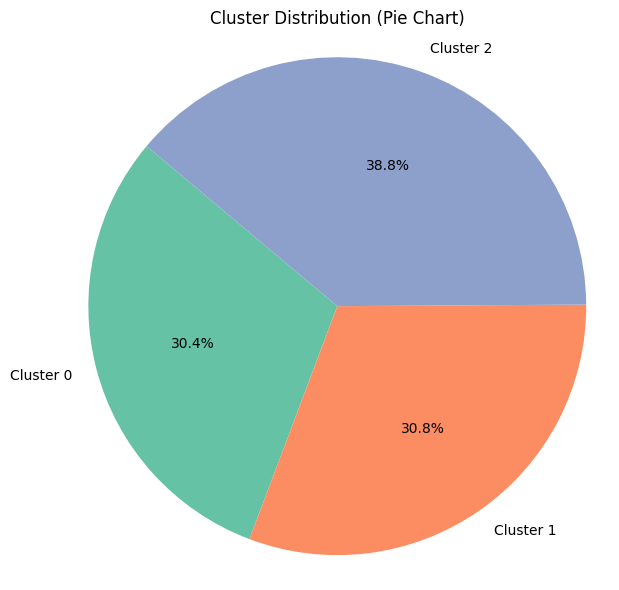

In [6]:
# 6. Pie Chart of Cluster Distribution
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(cluster_counts,
        labels=[f'Cluster {i}' for i in cluster_counts.index],
        autopct='%1.1f%%',
        colors=palette,
        startangle=140)

plt.title("Cluster Distribution (Pie Chart)")
plt.tight_layout()
plt.axis("equal")
plt.show()